# Importar datos

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNetCV, LassoCV
df = pd.read_csv("house-prices-tp.csv")

Renombramos columnas para mayor claridad durante el análisis

In [165]:
# 1) CRIM: tasa de criminalidad per cápita por ciudad
# 2) ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
# 3) INDUS: proporción de acres de negocios no minoristas por ciudad
# 4) CHAS: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)
# 5) NOX: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]
# 6) RM: número promedio de habitaciones por vivienda
# 7) AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
# 8) DIS: distancias ponderadas a cinco centros de empleo de Boston
# 9) RAD: índice de accesibilidad a las autopistas radiales
# 10) TAX: tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]
# 11) PTRATIO: proporción alumno-maestro por ciudad
# 12) B: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
# 13) LSTAT: % de población de menor estatus socioeconómico

# Variable de salida (target):

# 14) MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]

# Renombrar
df = df.rename({"CRIM": "crimenes",
    "ZN": "prop_residencial",
    "INDUS": "acres_industriales",
    "CHAS": "limita_con_rio",
    "NOX": "nitrogeno_pp10M",
    "RM": "habitaciones_prom",
    "AGE": "prop_antiguas",
    "DIS": "dist_centros_empl",
    "RAD": "acceso_radios",
    "TAX": "impuestos",
    "PTRATIO": "alumnosxmaestros",
    "B": "proporcion_negros",
    "LSTAT": "prop_estatus_bajo",
    "MEDV": "valor_mediano"}, axis=1)

# Análisis descriptivo

In [166]:
df.head(3)

,crimenes,prop_residencial,acres_industriales,limita_con_rio,nitrogeno_pp10M,habitaciones_prom,prop_antiguas,dist_centros_empl,acceso_radios,impuestos,alumnosxmaestros,proporcion_negros,prop_estatus_bajo,valor_mediano
0,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
1,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crimenes            533 non-null    float64
 1   prop_residencial    534 non-null    float64
 2   acres_industriales  541 non-null    float64
 3   limita_con_rio      533 non-null    float64
 4   nitrogeno_pp10M     532 non-null    float64
 5   habitaciones_prom   535 non-null    float64
 6   prop_antiguas       532 non-null    float64
 7   dist_centros_empl   541 non-null    float64
 8   acceso_radios       528 non-null    float64
 9   impuestos           538 non-null    float64
 10  alumnosxmaestros    528 non-null    float64
 11  proporcion_negros   534 non-null    float64
 12  prop_estatus_bajo   534 non-null    float64
 13  valor_mediano       535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


Vemos que se trata de todas variables numéricas continuas, excepto por `limita_con_rio`. Sin embargo notamos presencia de datos faltantes.

Para resolver esto, primero, haremos un drop de los datos para los que falta la variable objetivo `valor_mediano`

In [168]:
# Drop missing values in column MEDV
df = df.dropna(subset=["valor_mediano"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, 0 to 555
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crimenes            524 non-null    float64
 1   prop_residencial    524 non-null    float64
 2   acres_industriales  531 non-null    float64
 3   limita_con_rio      526 non-null    float64
 4   nitrogeno_pp10M     526 non-null    float64
 5   habitaciones_prom   528 non-null    float64
 6   prop_antiguas       524 non-null    float64
 7   dist_centros_empl   530 non-null    float64
 8   acceso_radios       523 non-null    float64
 9   impuestos           526 non-null    float64
 10  alumnosxmaestros    526 non-null    float64
 11  proporcion_negros   526 non-null    float64
 12  prop_estatus_bajo   526 non-null    float64
 13  valor_mediano       535 non-null    float64
dtypes: float64(14)
memory usage: 62.7 KB


Ahora, podemos hacer una división de los conjuntos de entrenamiento y testing, usando una división de 80-20.

In [169]:
# obtener 20% de los datos
df_train_original, df_test_original = train_test_split(df, test_size=0.2, random_state=42)
df = df_train_original.copy()
df_test = df_test_original.copy()

El resto de datos faltantes los veremos en el futuro, por ahora, hacemos un análisis descriptivo de los datos.

In [170]:
df.describe()

,crimenes,prop_residencial,acres_industriales,limita_con_rio,nitrogeno_pp10M,habitaciones_prom,prop_antiguas,dist_centros_empl,acceso_radios,impuestos,alumnosxmaestros,proporcion_negros,prop_estatus_bajo,valor_mediano
count,420.000000,419.000000,425.000000,420.000000,419.000000,421.000000,421.000000,425.000000,419.000000,421.000000,423.000000,421.000000,421.000000,428.000000
mean,5.185704,12.663532,11.317757,0.069048,0.560602,6.272484,67.715061,3.876906,9.906882,416.125557,18.397472,348.483764,13.120107,22.578842
std,12.221977,24.773329,6.927496,0.253837,0.119720,0.760823,28.911930,2.202275,8.845095,170.157523,2.232387,99.489261,7.619304,9.574930
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.870000,41.839732,2.072000,4.000000,281.000000,16.800000,370.730000,7.140000,16.175000
50%,0.327625,0.000000,9.900000,0.000000,0.538000,6.193000,75.000000,3.331700,5.000000,345.000000,19.000000,391.000000,11.740000,21.200000
75%,4.818015,20.000000,18.100000,0.000000,0.647000,6.649000,94.500000,5.287300,24.000000,666.000000,20.200000,395.690000,17.310000,25.300000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Vemos que existen variables de rangos muy variados, pero todas son no negativas.

## Visualización de datos

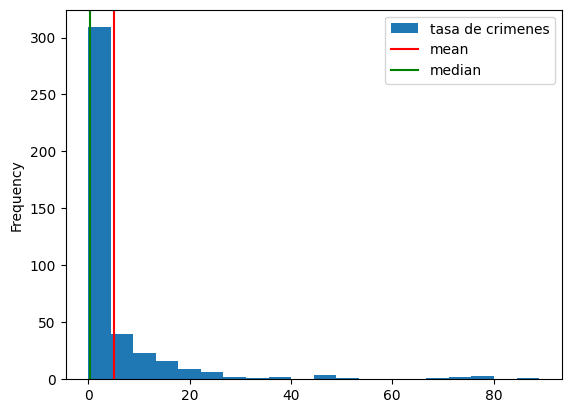

In [171]:
# Boxplot for CRIM
df.plot.hist(column="crimenes", bins=20)
# add mean and median lines
plt.axvline(x=df["crimenes"].mean(), color="red")
plt.axvline(x=df["crimenes"].median(), color="green")
# add legend
plt.legend(["tasa de crimenes", "mean", "median"])
plt.show()

Vemos que esta variable es altamente asimétrica hacia la derecha, con vasta presencia de outliers, y su máximo 20 veces mayor a su 3er cuartil.

Ahora, grafiquemos la proporción de terrenos residenciales.

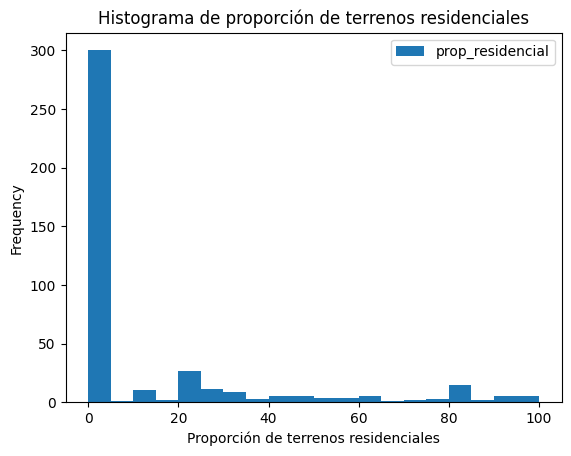

In [172]:
df.plot.hist(column="prop_residencial", bins=20)
plt.title("Histograma de proporción de terrenos residenciales")
plt.xlabel("Proporción de terrenos residenciales")
plt.show()

Vemos que la mayoría de barrios no tienen terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados. Con una mediana en 0. Similar al caso anterior, es asimétrica hacia la derecha y existen outliers, que llegan a tener una proporción del 100% de este tipo de terrenos.

Sigamos con nuestro análisis explorando los valores de la variables `acres industriales`.

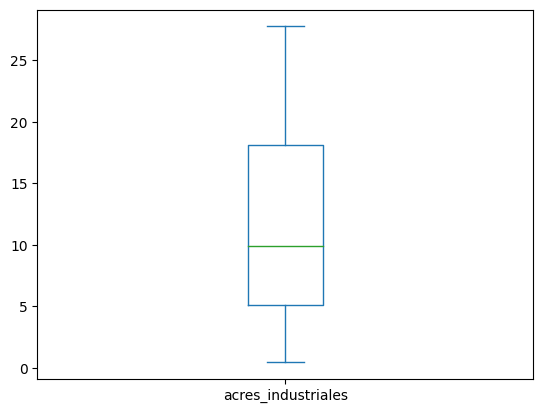

In [173]:
df.plot.box(column="acres_industriales")
plt.show()

En este caso, la variable no posee ni un outlier, lo cual nos dice que es una variable con una dispersión relativamente menor a las anteriores: La mayoría de barrios tienen una proporción relativamente similar de acres industriales.

Ahora, analicemos la variable de `limita_con_rio`, la única variable categórica:

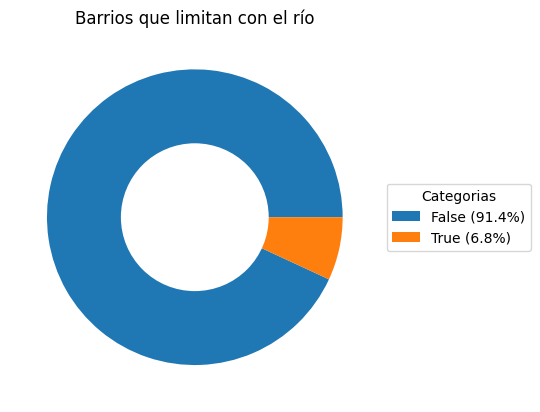

In [174]:
recuento_prop = df["limita_con_rio"].value_counts()/len(df["limita_con_rio"])
categorias = [f'{(valor == 1)} ({recuento_prop.loc[valor]*100:.1f}%)' for valor in recuento_prop.index]
valores = recuento_prop.iloc[0:]

fig, ax = plt.subplots()
ax.pie(valores, labels=None)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.legend(categorias,
          title="Categorias",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Barrios que limitan con el río")
plt.show()

Vemos que la gran mayoría de barrios no limitan con el río. Por otro lado, cabe aclarar que esta variable ya está One-Hot Encoded y por lo tanto este no será un paso en el preprocesamiento.

Ahora, analicemos la variable de `nitrogeno_pp10M`

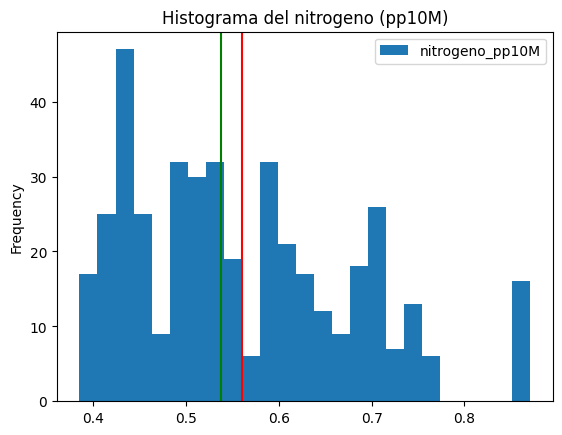

In [175]:
df.plot.hist(column="nitrogeno_pp10M", bins=25)
plt.title("Histograma del nitrogeno (pp10M)")
plt.axvline(x=df["nitrogeno_pp10M"].mean(), color="red")
plt.axvline(x=df["nitrogeno_pp10M"].median(), color="green")

plt.show()

Se puede observar que se trata de una variable multimodal, com múltiples picos a lo largo de su distribución. Para conocer más, realicemos un boxplot.

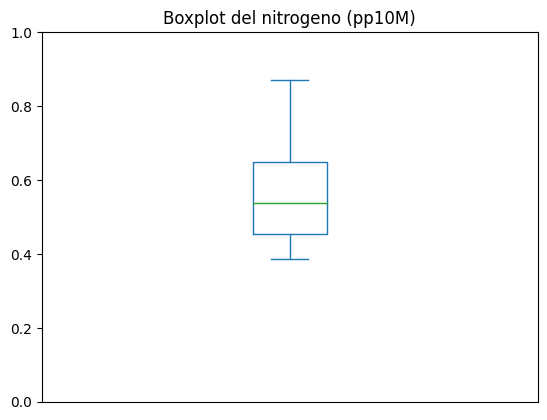

In [176]:
df.plot.box(column="nitrogeno_pp10M")
plt.title("Boxplot del nitrogeno (pp10M)")
plt.ylim(0, 1)
plt.xticks([])
plt.show()

Ahora podemos afirmar que la variable no posee outliers a pesar de su distribución dispersa.

Analicemos el promedio de promedio de viviendas por habitación.

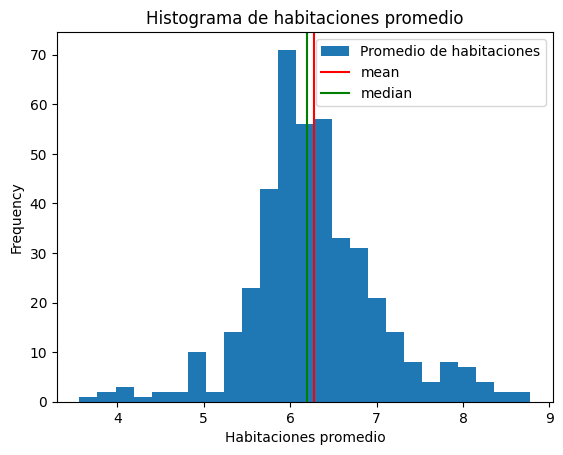

In [177]:
df.plot.hist(column="habitaciones_prom", bins=25)
plt.title("Histograma de habitaciones promedio")
# plot mean and median
plt.axvline(x=df["habitaciones_prom"].mean(), color="red")
plt.axvline(x=df["habitaciones_prom"].median(), color="green")
plt.legend(["Promedio de habitaciones", "mean", "median"])
plt.xlabel("Habitaciones promedio")

plt.show()

Notamos que se trata de una variable con una distribución relativamente simétrica, con una media y mediana muy similares.

Analicemos los barrios con habitaciones con una alta antigüedad (construidas antes de 1940).

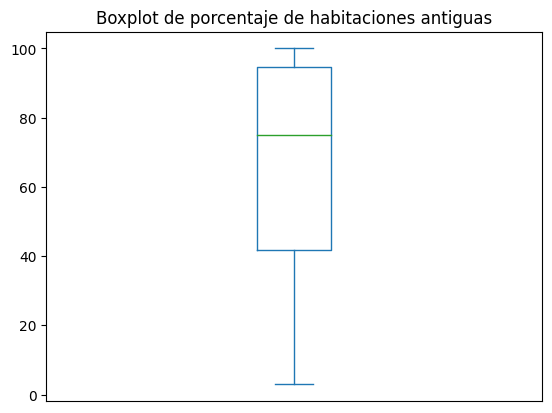

In [178]:
df.plot.box(column="prop_antiguas")
plt.title("Boxplot de porcentaje de habitaciones antiguas")
plt.xticks([])
plt.show()

Se observa una distribución con una alta asimetría hacia la izquierda. La mayoría de barrios tienen una alta proporción de casas antiguas.

Ahora, analizamos la distribución de la distancia ponderada a cinco centros de empleo en cada barrio.

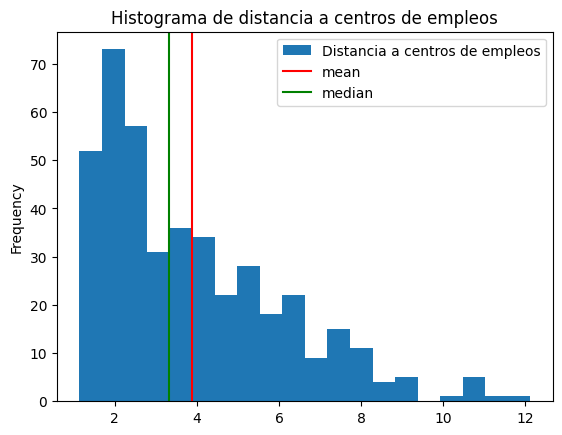

In [179]:
df.plot.hist(column="dist_centros_empl", bins=20)
plt.title("Histograma de distancia a centros de empleos")
# plot mean and median
plt.axvline(x=df["dist_centros_empl"].mean(), color="red")
plt.axvline(x=df["dist_centros_empl"].median(), color="green")
plt.legend(["Distancia a centros de empleos", "mean", "median"])
plt.show()

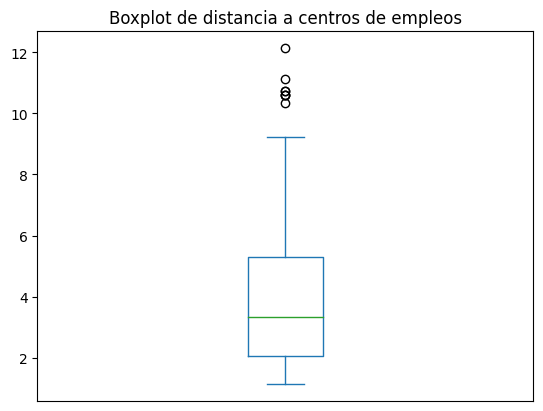

In [180]:
df.plot.box(column="dist_centros_empl")
plt.title("Boxplot de distancia a centros de empleos")
plt.xticks([])
plt.show()

Notamos que la variable es asimétrica hacia la derecha, y que decrece casi monótonamente, con una baja presencia de outliers.

Toca ver la distribución del índice de accesibilidad a autopistas radiales.

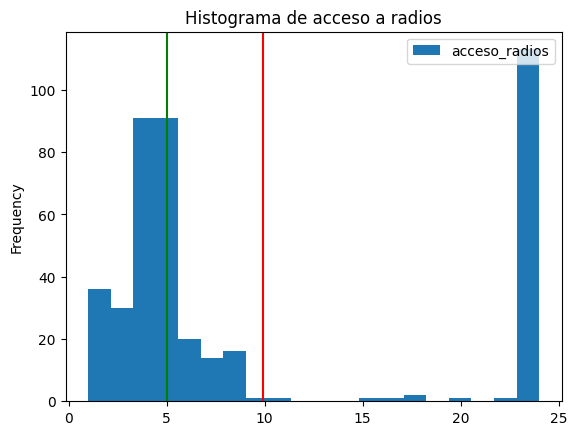

In [181]:
df.plot.hist(column="acceso_radios", bins=20)
plt.title("Histograma de acceso a radios")
plt.axvline(x=df["acceso_radios"].mean(), color="red")
plt.axvline(x=df["acceso_radios"].median(), color="green")

plt.show()

Se observa una clara bimodalidad en la variable. Analicemos si los valores más altos son o no detectados como outliers en un boxplot.

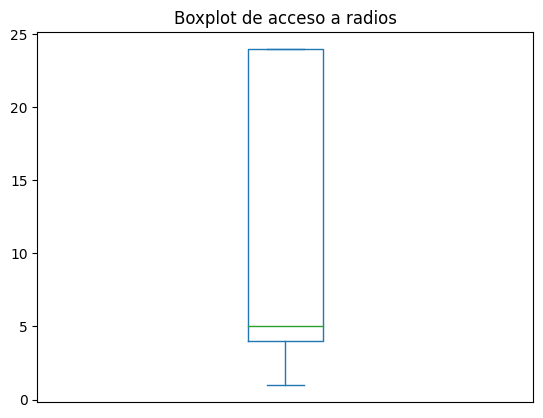

In [182]:
df.plot.box(column="acceso_radios")
plt.title("Boxplot de acceso a radios")
plt.xticks([])
plt.show()

Vemos que no se detecta como un outlier. Existen 2 grandes clusters de datos, y el tercer cuartil se ubica en el segundo de estos, resultando en un rango intercuartílico es prácticamente igual al rango de la variable.

Ahora, analicemos la variable `impuestos`.

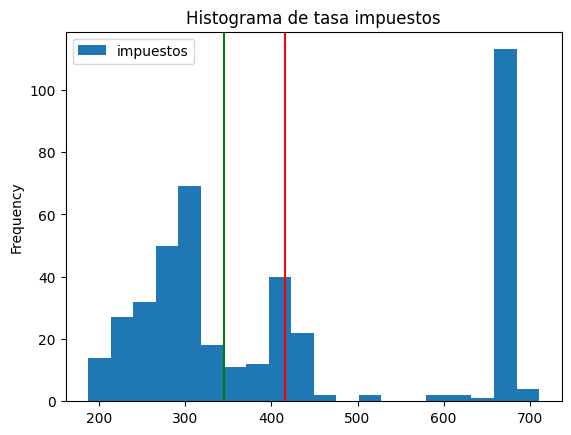

In [183]:
df.plot.hist(column="impuestos", bins=20)
plt.title("Histograma de tasa impuestos")
plt.axvline(x=df["impuestos"].mean(), color="red")
plt.axvline(x=df["impuestos"].median(), color="green")
plt.show()

Notamos una clara bimodalidad (o incluso trimodalidad) en la variable, con una gran cantidad de barrios

Ahora, veamos cómo se distribuye la proporción de alumnos por maestros.

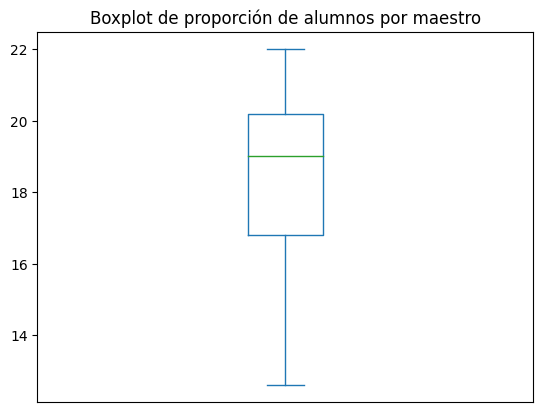

In [184]:
df.plot.box(column="alumnosxmaestros")
plt.title("Boxplot de proporción de alumnos por maestro")
plt.xticks([])
plt.show()

Vemos que nuevamente, esta variable no posee outliers. Siendo su mínimo poco más de la mitad del máximo.

Ahora, observemos la variable

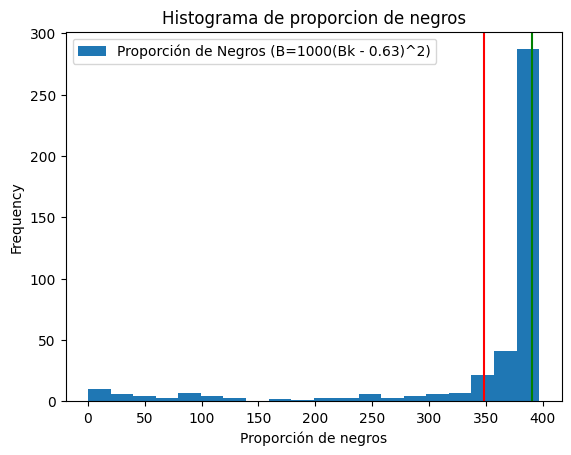

In [185]:
df.plot.hist(column="proporcion_negros", bins=20)
plt.title("Histograma de proporcion de negros")
plt.xlabel("Proporción de negros")
plt.axvline(x=df["proporcion_negros"].mean(), color="red")
plt.axvline(x=df["proporcion_negros"].median(), color="green")
plt.legend(["Proporción de Negros (B=1000(Bk - 0.63)^2)"])
plt.show()

Se observa que la mayoría de barrios tienen una proporción similar de negros, con cierta cantidad de barrios con una proporción mucho más baja. Se observa una gran proporción de outliers.

Analicemos la proporción de personas de estatus bajos para los barrios.

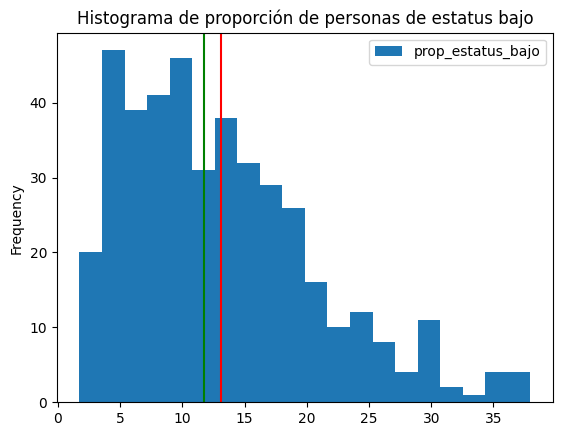

In [186]:
df.plot.hist(column="prop_estatus_bajo", bins=20)
plt.title("Histograma de proporción de personas de estatus bajo")

plt.axvline(x=df["prop_estatus_bajo"].mean(), color="red")
plt.axvline(x=df["prop_estatus_bajo"].median(), color="green")
plt.show()

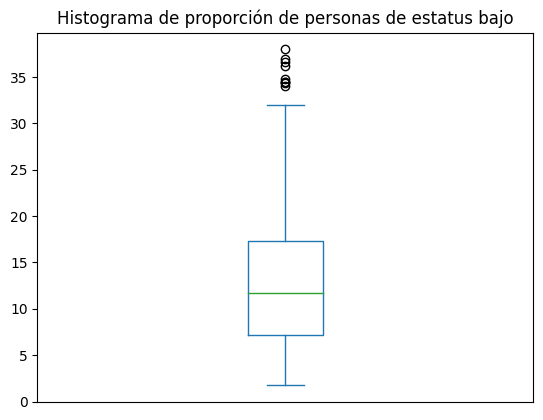

In [187]:
df.plot.box(column="prop_estatus_bajo")
plt.title("Histograma de proporción de personas de estatus bajo")
plt.xticks([])
plt.show()

La variable es asimétrica a la derecha, con presencia de outliers.

Finalmente, analicemos la distribución de la variable objetivo `valor_mediano`. 

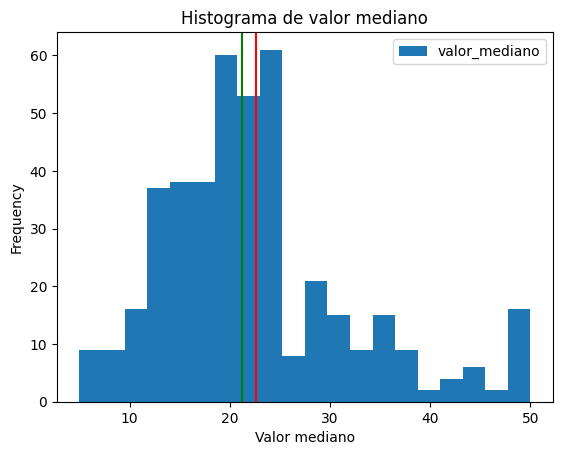

In [188]:
df.plot.hist(column="valor_mediano", bins=20)
plt.title("Histograma de valor mediano")
plt.axvline(x=df["valor_mediano"].mean(), color="red")
plt.axvline(x=df["valor_mediano"].median(), color="green")
plt.xlabel("Valor mediano")
plt.show()

Se observa que el valor mediano es levemente asimétrico hacia la derecha. Hagamos un boxplot para entender mejor esta variable.

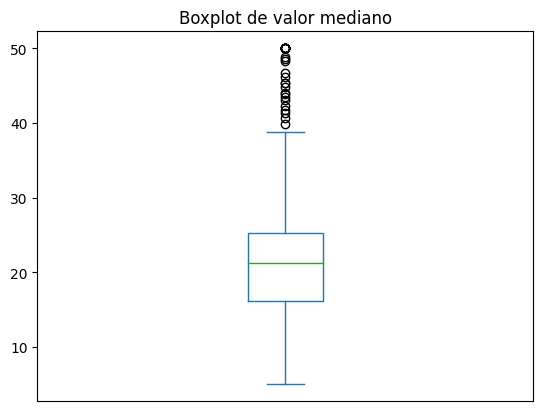

In [189]:
df.plot.box(column="valor_mediano")
plt.title("Boxplot de valor mediano")
plt.xticks([])
plt.show()

Ahora es posible observar que la variable objetivo tiene una alta presencia de outliers. Esto puede explicarse con el hecho que existen muchas propiedades que tienen un precio mucho mayor al de todas las demás.

In [190]:
df["valor_mediano"].value_counts()

valor_mediano
50.0    13
23.1     7
25.0     7
21.7     6
20.6     6
        ..
26.2     1
17.7     1
12.1     1
28.4     1
28.0     1
Name: count, Length: 228, dtype: int64

Llamativamente, vemos que la moda de esta variable es 50, con más del doble de apariciones que el segundo valor más común, al mismo tiempo que es el valor más alto y un outlier. Esto probablemente se deba a que valores que originalmente eran mayores a 50 atravesaron un proceso de limpieza de manera que valgan 50.

## Analisis bivariado

Para seleccionar pares de variables sobre las que realizar un análisis bivariado, hagamos una matriz de correlación, para conocer si existen relaciones que podamos observar entre nuestras variables.

<Axes: >

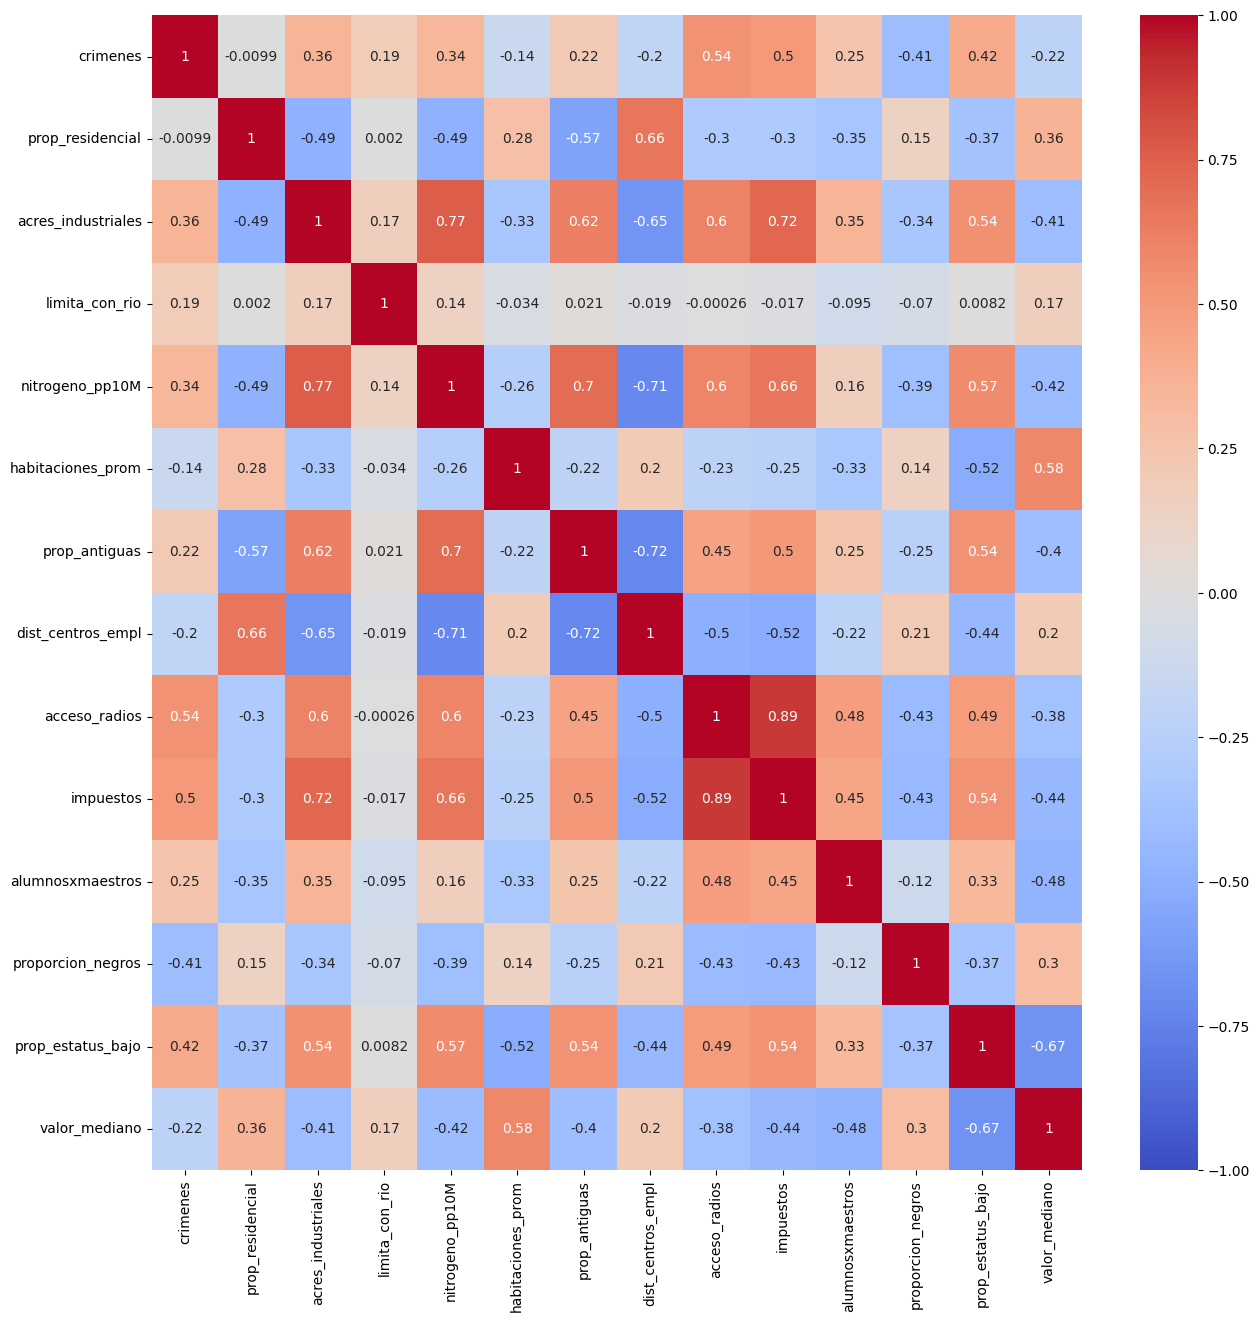

In [191]:
# matriz de correlación
plt.figure(figsize=(15,15))
from seaborn import heatmap

heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap="coolwarm")

Notamos que existe una correlación alta entre los pares de variables:
- `impuestos` y `acceso_radios` (0.89)
- `nitrogeno_pp10M` y `acres_industriales` (0.77)
- `dist_centros_empl` y `prop_antiguas` (-0.72)
- `impuestos` y `acres_industriales` (0.72)
- `dist_centros_empl` y `nitrogeno_pp10M` (-0.71)
- `nitrogeno_pp10M` y `prop_antiguas` (0.7)

Por otro lado, las variables más correlacionadas con la variable objetivo son:
- `prop_estatus_bajo` (-0.67)
- `habitaciones_promedio` (0.58)
- `alumnosxmaestros` (-0.48)

Dado que la variable `proporcion_negros` se trata de una variable que es el resultado de una función cuadrática, nos parece que sería interesante ver si cambian las correlaciones lineales tomando la raíz cuadrada de este valor.

In [192]:
df2 = df.copy()

df2["proporcion_negros"] = np.sqrt(df2["proporcion_negros"])

df2.head(4)

,crimenes,prop_residencial,acres_industriales,limita_con_rio,nitrogeno_pp10M,habitaciones_prom,prop_antiguas,dist_centros_empl,acceso_radios,impuestos,alumnosxmaestros,proporcion_negros,prop_estatus_bajo,valor_mediano
290,0.178990,0.000000,9.690000,0.0,0.585,5.670000,28.800000,2.798600,6.0,391.0,19.200000,19.831541,17.600000,23.100000
357,0.047410,0.000000,11.930000,0.0,0.573,6.030000,80.800000,2.505000,1.0,273.0,21.000000,19.922349,7.880000,11.900000
458,12.510504,11.610423,14.404205,0.0,NaN,7.949105,95.592034,1.263211,NaN,NaN,12.865192,16.875648,27.789443,28.812426
438,0.110270,25.000000,5.130000,0.0,0.453,6.456000,67.800000,7.225500,8.0,284.0,19.700000,19.922349,6.730000,22.200000


<Axes: >

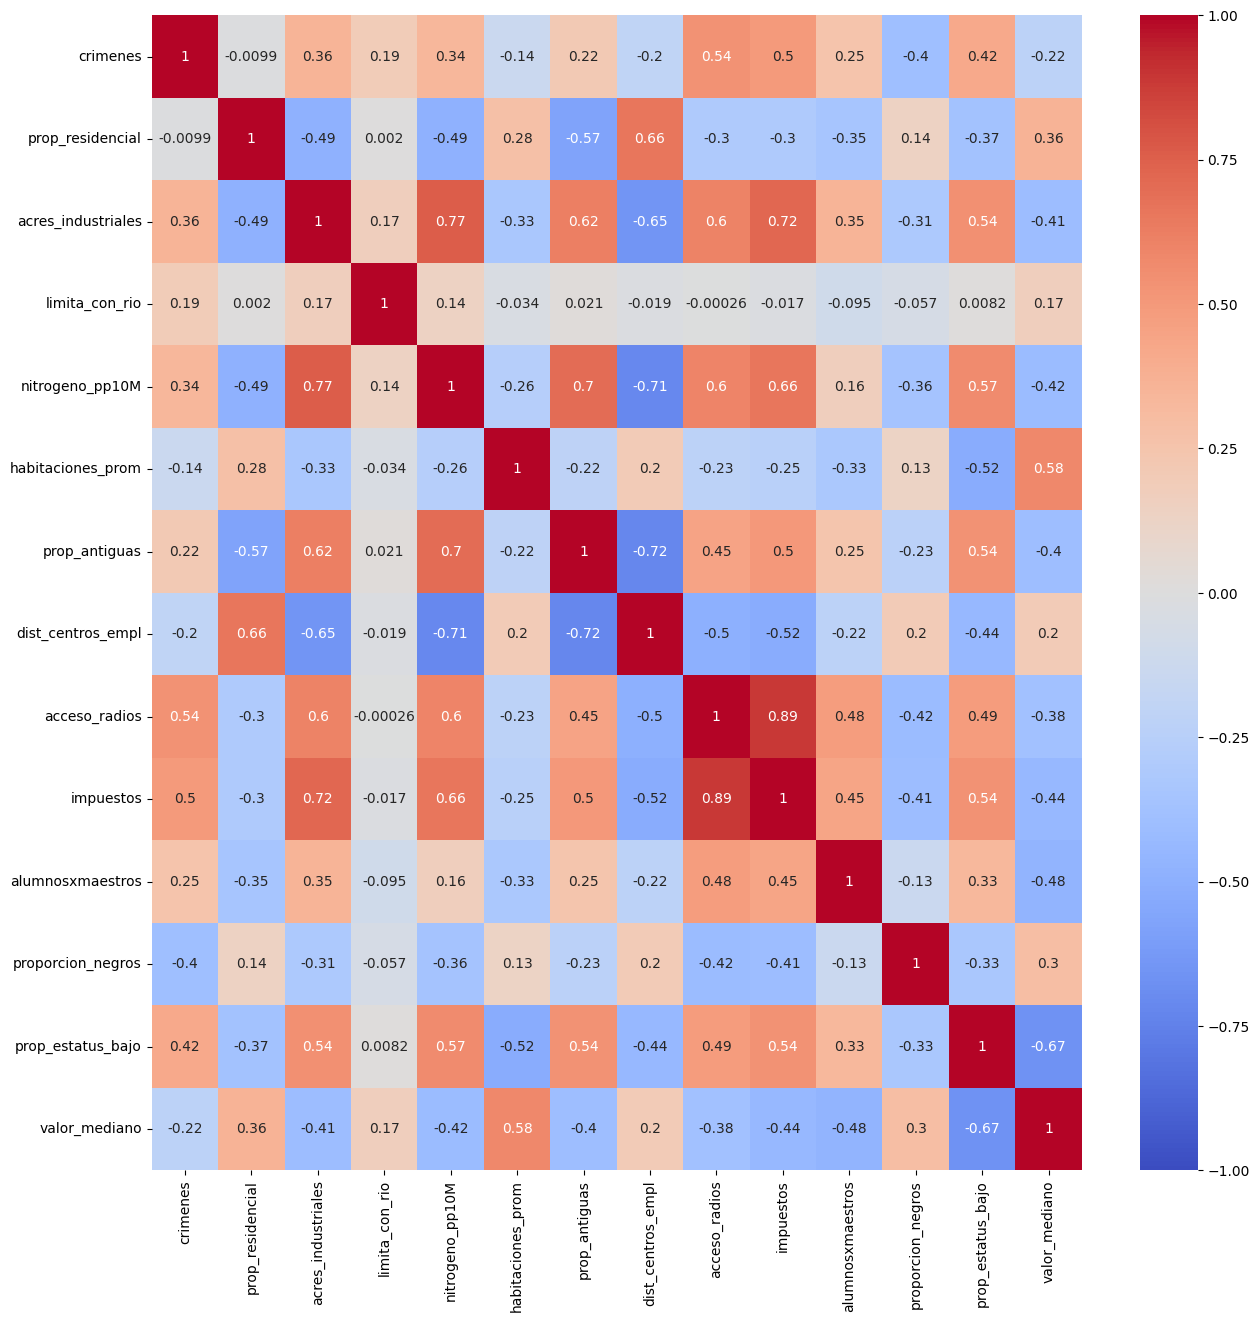

In [193]:
plt.figure(figsize=(15,15))
heatmap(df2.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap="coolwarm")

Sorpresivamente, no observamos cambios significativos en el nivel de correlación lineales entre variables.

Ahora, grafiquemos la relación de las variables
- `prop_estatus_bajo`
- `habitaciones_promedio`
- `alumnosxmaestros`
con el valor mediano. 

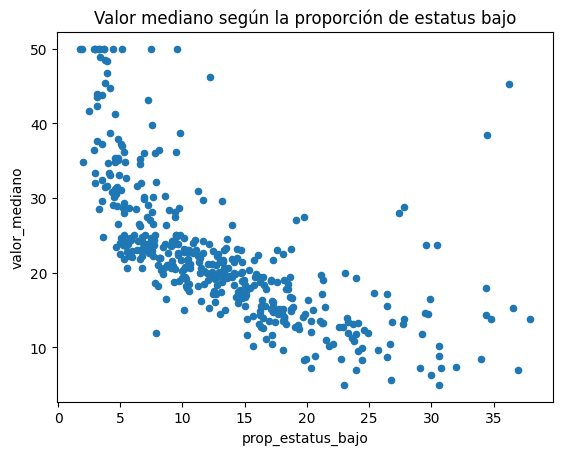

In [194]:
df.plot.scatter(x="prop_estatus_bajo", y="valor_mediano")
plt.title("Valor mediano según la proporción de estatus bajo")
plt.show()

Vemos que la relación se asemeja a una función logarímica negativa, más que a una función lineal, con clara presencia de valores atípicos.

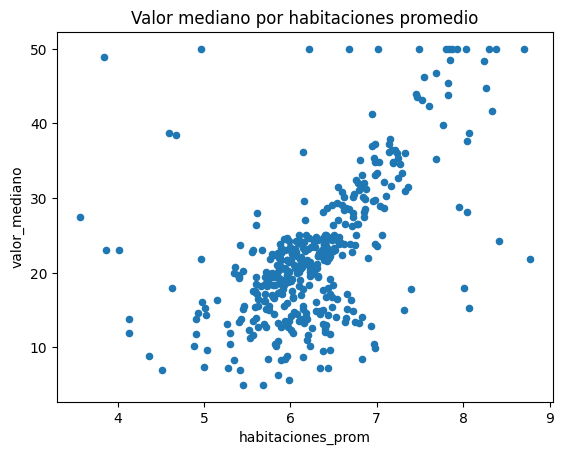

In [195]:
df.plot.scatter(x="habitaciones_prom", y="valor_mediano")
plt.title("Valor mediano por habitaciones promedio")
plt.show()

Esta relacióm tiene una forma más claramente lineal.

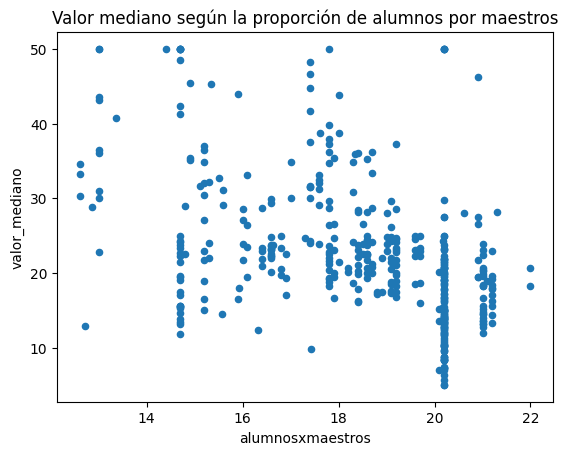

In [196]:
df.plot.scatter(x="alumnosxmaestros", y="valor_mediano")
plt.title("Valor mediano según la proporción de alumnos por maestros")
plt.show()

En este caso, la correlación es más difusa y no tan fácilmente observable, lo cual se corresponde con el menor nivel de correlación lineal de Pearson. Sin embargo, se nota una leve tendencia a la baja en el valor mediano a medida que la proporción de alumnos por maestro aumenta.

# Limpieza de datos

Recordemos que nuestro dataset tiene varios valores faltantes.

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 290 to 106
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crimenes            420 non-null    float64
 1   prop_residencial    419 non-null    float64
 2   acres_industriales  425 non-null    float64
 3   limita_con_rio      420 non-null    float64
 4   nitrogeno_pp10M     419 non-null    float64
 5   habitaciones_prom   421 non-null    float64
 6   prop_antiguas       421 non-null    float64
 7   dist_centros_empl   425 non-null    float64
 8   acceso_radios       419 non-null    float64
 9   impuestos           421 non-null    float64
 10  alumnosxmaestros    423 non-null    float64
 11  proporcion_negros   421 non-null    float64
 12  prop_estatus_bajo   421 non-null    float64
 13  valor_mediano       428 non-null    float64
dtypes: float64(14)
memory usage: 50.2 KB


## Imputacion por media y mediana (SimpleImputter)

Esto podemos solucionarlo rellenando los datos faltantes con el SimpleImputer de scikit-learn. Primero, con la única variable categórica que tenemos.

In [198]:
imputer_categorico = SimpleImputer(strategy="most_frequent")

df_categorico = df[["limita_con_rio"]]
df_categorico = pd.DataFrame(imputer_categorico.fit_transform(df_categorico), columns=df_categorico.columns)

Luego, rellenemos datos faltantes en las variables que conocemos que no tienen outliers, o los outliers son pocos o poco alejados del resto de la distribución, por el análisis univariado que realizamos, haciendo imputación por la media.

In [199]:
imputador_media = SimpleImputer(strategy="mean")


df_numerico_media = df.drop(columns=["limita_con_rio", "valor_mediano", "acceso_radios", "proporcion_negros", "impuestos", "crimenes", "prop_residencial"])

df_numerico_media = pd.DataFrame(imputador_media.fit_transform(df_numerico_media), columns=df_numerico_media.columns)

df_numerico_media.describe()

,acres_industriales,nitrogeno_pp10M,habitaciones_prom,prop_antiguas,dist_centros_empl,alumnosxmaestros,prop_estatus_bajo
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,11.317757,0.560602,6.272484,67.715061,3.876906,18.397472,13.120107
std,6.903118,0.118451,0.754561,28.673967,2.194525,2.219279,7.556593
min,0.460000,0.385000,3.561000,2.900000,1.137000,12.600000,1.730000
25%,5.130000,0.453000,5.871750,42.200000,2.077100,16.875000,7.187500
50%,9.900000,0.538000,6.208500,74.350000,3.361800,19.000000,12.080000
75%,18.100000,0.636155,6.633000,94.425000,5.287300,20.200000,17.272500
max,27.740000,0.871000,8.780000,100.000000,12.126500,22.000000,37.970000


Para el resto de variables, utilizaremos la mediana, al ser una medida más robusta, por lo que no se verá tan afectada por estos valores atípicos.

Adicionalmente, añadiremos las variables `acesso_radios`, `tasa_impuestos`, al presentar una distribución altamente bimodal, en la cual la media no es un valor representaetivo de la distribución. 

In [200]:
imputador_mediana = SimpleImputer(strategy="median")

df_numerico_mediana = df.drop(columns=["limita_con_rio", "valor_mediano", "prop_estatus_bajo", "dist_centros_empl", "acres_industriales", "nitrogeno_pp10M", "alumnosxmaestros", "habitaciones_prom", "prop_antiguas"])

df_numerico_mediana = pd.DataFrame(imputador_mediana.fit_transform(df_numerico_mediana), columns=df_numerico_mediana.columns)

df_numerico_mediana.describe()

,crimenes,prop_residencial,acceso_radios,impuestos,proporcion_negros
count,428.000000,428.000000,428.000000,428.000000,428.000000
mean,5.094898,12.397243,9.803700,414.962289,349.179123
std,12.124851,24.578269,8.779722,168.998548,98.818002
min,0.006320,0.000000,1.000000,187.000000,0.320000
25%,0.082155,0.000000,4.000000,283.250000,370.938548
50%,0.327625,0.000000,5.000000,345.000000,391.000000
75%,4.689715,17.581181,24.000000,666.000000,395.640000
max,88.976200,100.000000,24.000000,711.000000,396.900000


Luego, debemos estandarizar las variables numéricas.

In [201]:
scaler = StandardScaler()
df_numerico = pd.concat([df_numerico_media, df_numerico_mediana], axis=1)

df_numerico = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)
df_numerico.describe()

,acres_industriales,nitrogeno_pp10M,habitaciones_prom,prop_antiguas,dist_centros_empl,alumnosxmaestros,prop_estatus_bajo,crimenes,prop_residencial,acceso_radios,impuestos,proporcion_negros
count,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02
mean,4.150366e-18,-7.387652e-16,-1.054193e-15,1.452628e-16,9.545843e-17,1.585440e-15,-2.490220e-16,-2.490220e-17,3.320293e-17,1.411125e-16,-4.814425e-16,-4.897432e-16
std,1.001170e+00,1.001170e+00,1.001170e+00,1.001170e+00,1.001170e+00,1.001170e+00,1.001170e+00,1.001170e+00,1.001170e+00,1.001170e+00,1.001170e+00,1.001170e+00
min,-1.574718e+00,-1.484217e+00,-3.597666e+00,-2.263060e+00,-1.249980e+00,-2.615380e+00,-1.509071e+00,-4.201729e-01,-5.049888e-01,-1.003905e+00,-1.350479e+00,-3.534451e+00
25%,-8.974204e-01,-9.094698e-01,-5.317044e-01,-8.908750e-01,-8.210943e-01,-6.868239e-01,-7.860090e-01,-4.139111e-01,-5.049888e-01,-6.618082e-01,-7.802814e-01,2.204547e-01
50%,-2.056196e-01,-1.910362e-01,-8.489609e-02,2.316632e-01,-2.349977e-01,2.718150e-01,-1.378034e-01,-3.936422e-01,-5.049888e-01,-5.477761e-01,-4.144661e-01,4.237064e-01
75%,9.836396e-01,6.385836e-01,4.783412e-01,9.325949e-01,6.434400e-01,8.131640e-01,5.501491e-01,-3.345671e-02,2.111624e-01,1.618834e+00,1.487181e+00,4.707163e-01
max,2.381744e+00,2.623533e+00,3.327035e+00,1.127250e+00,3.763570e+00,1.625187e+00,3.292354e+00,6.926227e+00,3.568407e+00,1.618834e+00,1.753767e+00,4.834820e-01


In [202]:
# df valor mediano mantenía el índice del df original, lo que causaba problemas al concatenar, ya que pd.concat parece concatenar basándose en el índice.
df_train_simple = pd.concat([df_numerico, df_categorico, df["valor_mediano"].reset_index(drop=True)], axis=1)
df_train_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acres_industriales  428 non-null    float64
 1   nitrogeno_pp10M     428 non-null    float64
 2   habitaciones_prom   428 non-null    float64
 3   prop_antiguas       428 non-null    float64
 4   dist_centros_empl   428 non-null    float64
 5   alumnosxmaestros    428 non-null    float64
 6   prop_estatus_bajo   428 non-null    float64
 7   crimenes            428 non-null    float64
 8   prop_residencial    428 non-null    float64
 9   acceso_radios       428 non-null    float64
 10  impuestos           428 non-null    float64
 11  proporcion_negros   428 non-null    float64
 12  limita_con_rio      428 non-null    float64
 13  valor_mediano       428 non-null    float64
dtypes: float64(14)
memory usage: 46.9 KB


In [203]:

df_test_categorico = df_test[["limita_con_rio"]]
df_test_categorico = pd.DataFrame(imputer_categorico.transform(df_test_categorico), columns=df_categorico.columns)

df_test_numerico_media = df_test.drop(columns=["limita_con_rio", "valor_mediano", "acceso_radios", "proporcion_negros", "impuestos", "crimenes", "prop_residencial"])

df_test_numerico_media = pd.DataFrame(imputador_media.transform(df_test_numerico_media), columns=df_test_numerico_media.columns)



df_test_numerico_mediana = df_test.drop(columns=["limita_con_rio", "valor_mediano", "prop_estatus_bajo", "dist_centros_empl", "acres_industriales", "nitrogeno_pp10M", "alumnosxmaestros", "habitaciones_prom", "prop_antiguas"])

df_test_numerico_mediana = pd.DataFrame(imputador_mediana.transform(df_test_numerico_mediana), columns=df_test_numerico_mediana.columns)


df_test_numerico = pd.concat([df_test_numerico_media, df_test_numerico_mediana], axis=1)

df_test_numerico = pd.DataFrame(scaler.transform(df_test_numerico), columns=df_test_numerico.columns)


df_test_simple = pd.concat([df_test_numerico, df_test_categorico, df_test["valor_mediano"].reset_index(drop=True)], axis=1)
df_test_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acres_industriales  107 non-null    float64
 1   nitrogeno_pp10M     107 non-null    float64
 2   habitaciones_prom   107 non-null    float64
 3   prop_antiguas       107 non-null    float64
 4   dist_centros_empl   107 non-null    float64
 5   alumnosxmaestros    107 non-null    float64
 6   prop_estatus_bajo   107 non-null    float64
 7   crimenes            107 non-null    float64
 8   prop_residencial    107 non-null    float64
 9   acceso_radios       107 non-null    float64
 10  impuestos           107 non-null    float64
 11  proporcion_negros   107 non-null    float64
 12  limita_con_rio      107 non-null    float64
 13  valor_mediano       107 non-null    float64
dtypes: float64(14)
memory usage: 11.8 KB


## Imputacion por KNN

In [204]:
scaler = StandardScaler()
knn_imputer = KNNImputer()
df_train = df_train_original.copy()
df_train_knn = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_train_knn = pd.DataFrame(knn_imputer.fit_transform(df_train), columns=df_train.columns)

df_test = df_test_original.copy()
df_test_knn = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)
df_test_knn = pd.DataFrame(knn_imputer.transform(df_test), columns=df_test.columns)

# Regresion Lineal

In [205]:
def error_regresion(X_train, y_train, X_test, y_test, model):
    # Error entrenamiento
    y_train_pred = model.predict(X_train)
    # MAE de train
    mae_train = mean_absolute_error(y_train, y_train_pred)
    # RMSE de train
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    # R2 score train
    r2_train = r2_score(y_train, y_train_pred)

    # Error test
    y_test_pred = model.predict(X_test)

    # MAE de test
    mae_test = mean_absolute_error(y_test, y_test_pred)
    # RMSE de test
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    # R2 score test
    r2_test = r2_score(y_test, y_test_pred)
    
    
    # Print results
    print("MAE de Entrenamiento:", mae_train)
    print("RMSE de Entrenamiento:", rmse_train)
    print("R2 de Entrenamiento:", r2_train)
    print("MAE de Test:", mae_test)
    print("RMSE de Test:", rmse_test)
    print("R2 de Test:", r2_test)
    

### Simple imputer

In [206]:
model = LinearRegression()

df_train_simple = df_train_simple.reindex(sorted(df_test_simple.columns), axis=1)
df_test_simple = df_test_simple.reindex(sorted(df_test_simple.columns), axis=1)
X_train = df_train_simple.drop(columns=["valor_mediano"])
y_train = df_train_simple["valor_mediano"]

X_test = df_test_simple.drop(columns=["valor_mediano"])
y_test = df_test_simple["valor_mediano"]

model.fit(X_train, y_train)
error_regresion(X_train, y_train, X_test, y_test, model)


MAE de Entrenamiento: 3.846443089645504
RMSE de Entrenamiento: 5.532445235830212
R2 de Entrenamiento: 0.6653591868588726
MAE de Test: 4.693261434884858
RMSE de Test: 7.588071271938112
R2 de Test: 0.3077117424630632


### Imputación por KNN

In [207]:
X_train = df_train_knn.drop(columns=["valor_mediano"])
y_train = df_train_knn["valor_mediano"]

X_test = df_test_knn.drop(columns=["valor_mediano"])
y_test = df_test_knn["valor_mediano"]

model.fit(X_train, y_train)
error_regresion(X_train, y_train, X_test, y_test, model)


MAE de Entrenamiento: 3.7726935762875384
RMSE de Entrenamiento: 5.427751832152983
R2 de Entrenamiento: 0.6779045241417275
MAE de Test: 4.617827672682384
RMSE de Test: 7.357808813441936
R2 de Test: 0.34908967557300585


Observamos una performance levemente mejor (15%) mediante la imputación, por lo cual usaremos estos datos para la regularización Ridge y Lasso.

## Regularización

### Ridge

In [208]:

ridgeCV = RidgeCV()  # alpha controla la fuerza de la regularización L2 (Ridge)

ridgeCV.fit(X_train, y_train)

print(ridgeCV.alpha_)

print("\nCoeficientes del modelo Ridge:")
print(ridgeCV.coef_)
print(ridgeCV.score(X_train,y_train))


0.1

Coeficientes del modelo Ridge:
[ 3.12257402e-02  7.23884824e-02  2.06768359e-02  6.90523217e+00
 -1.63108003e+01  3.48916578e+00 -4.28139443e-02 -1.86657818e+00
  1.58797914e-01 -1.04595329e-02 -8.59684318e-01  5.82190624e-03
 -4.76848148e-01]
0.6778585468697578
